<div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 1);">
    <strong>🔥FETAL HEALTH🔥</strong>
</div>



 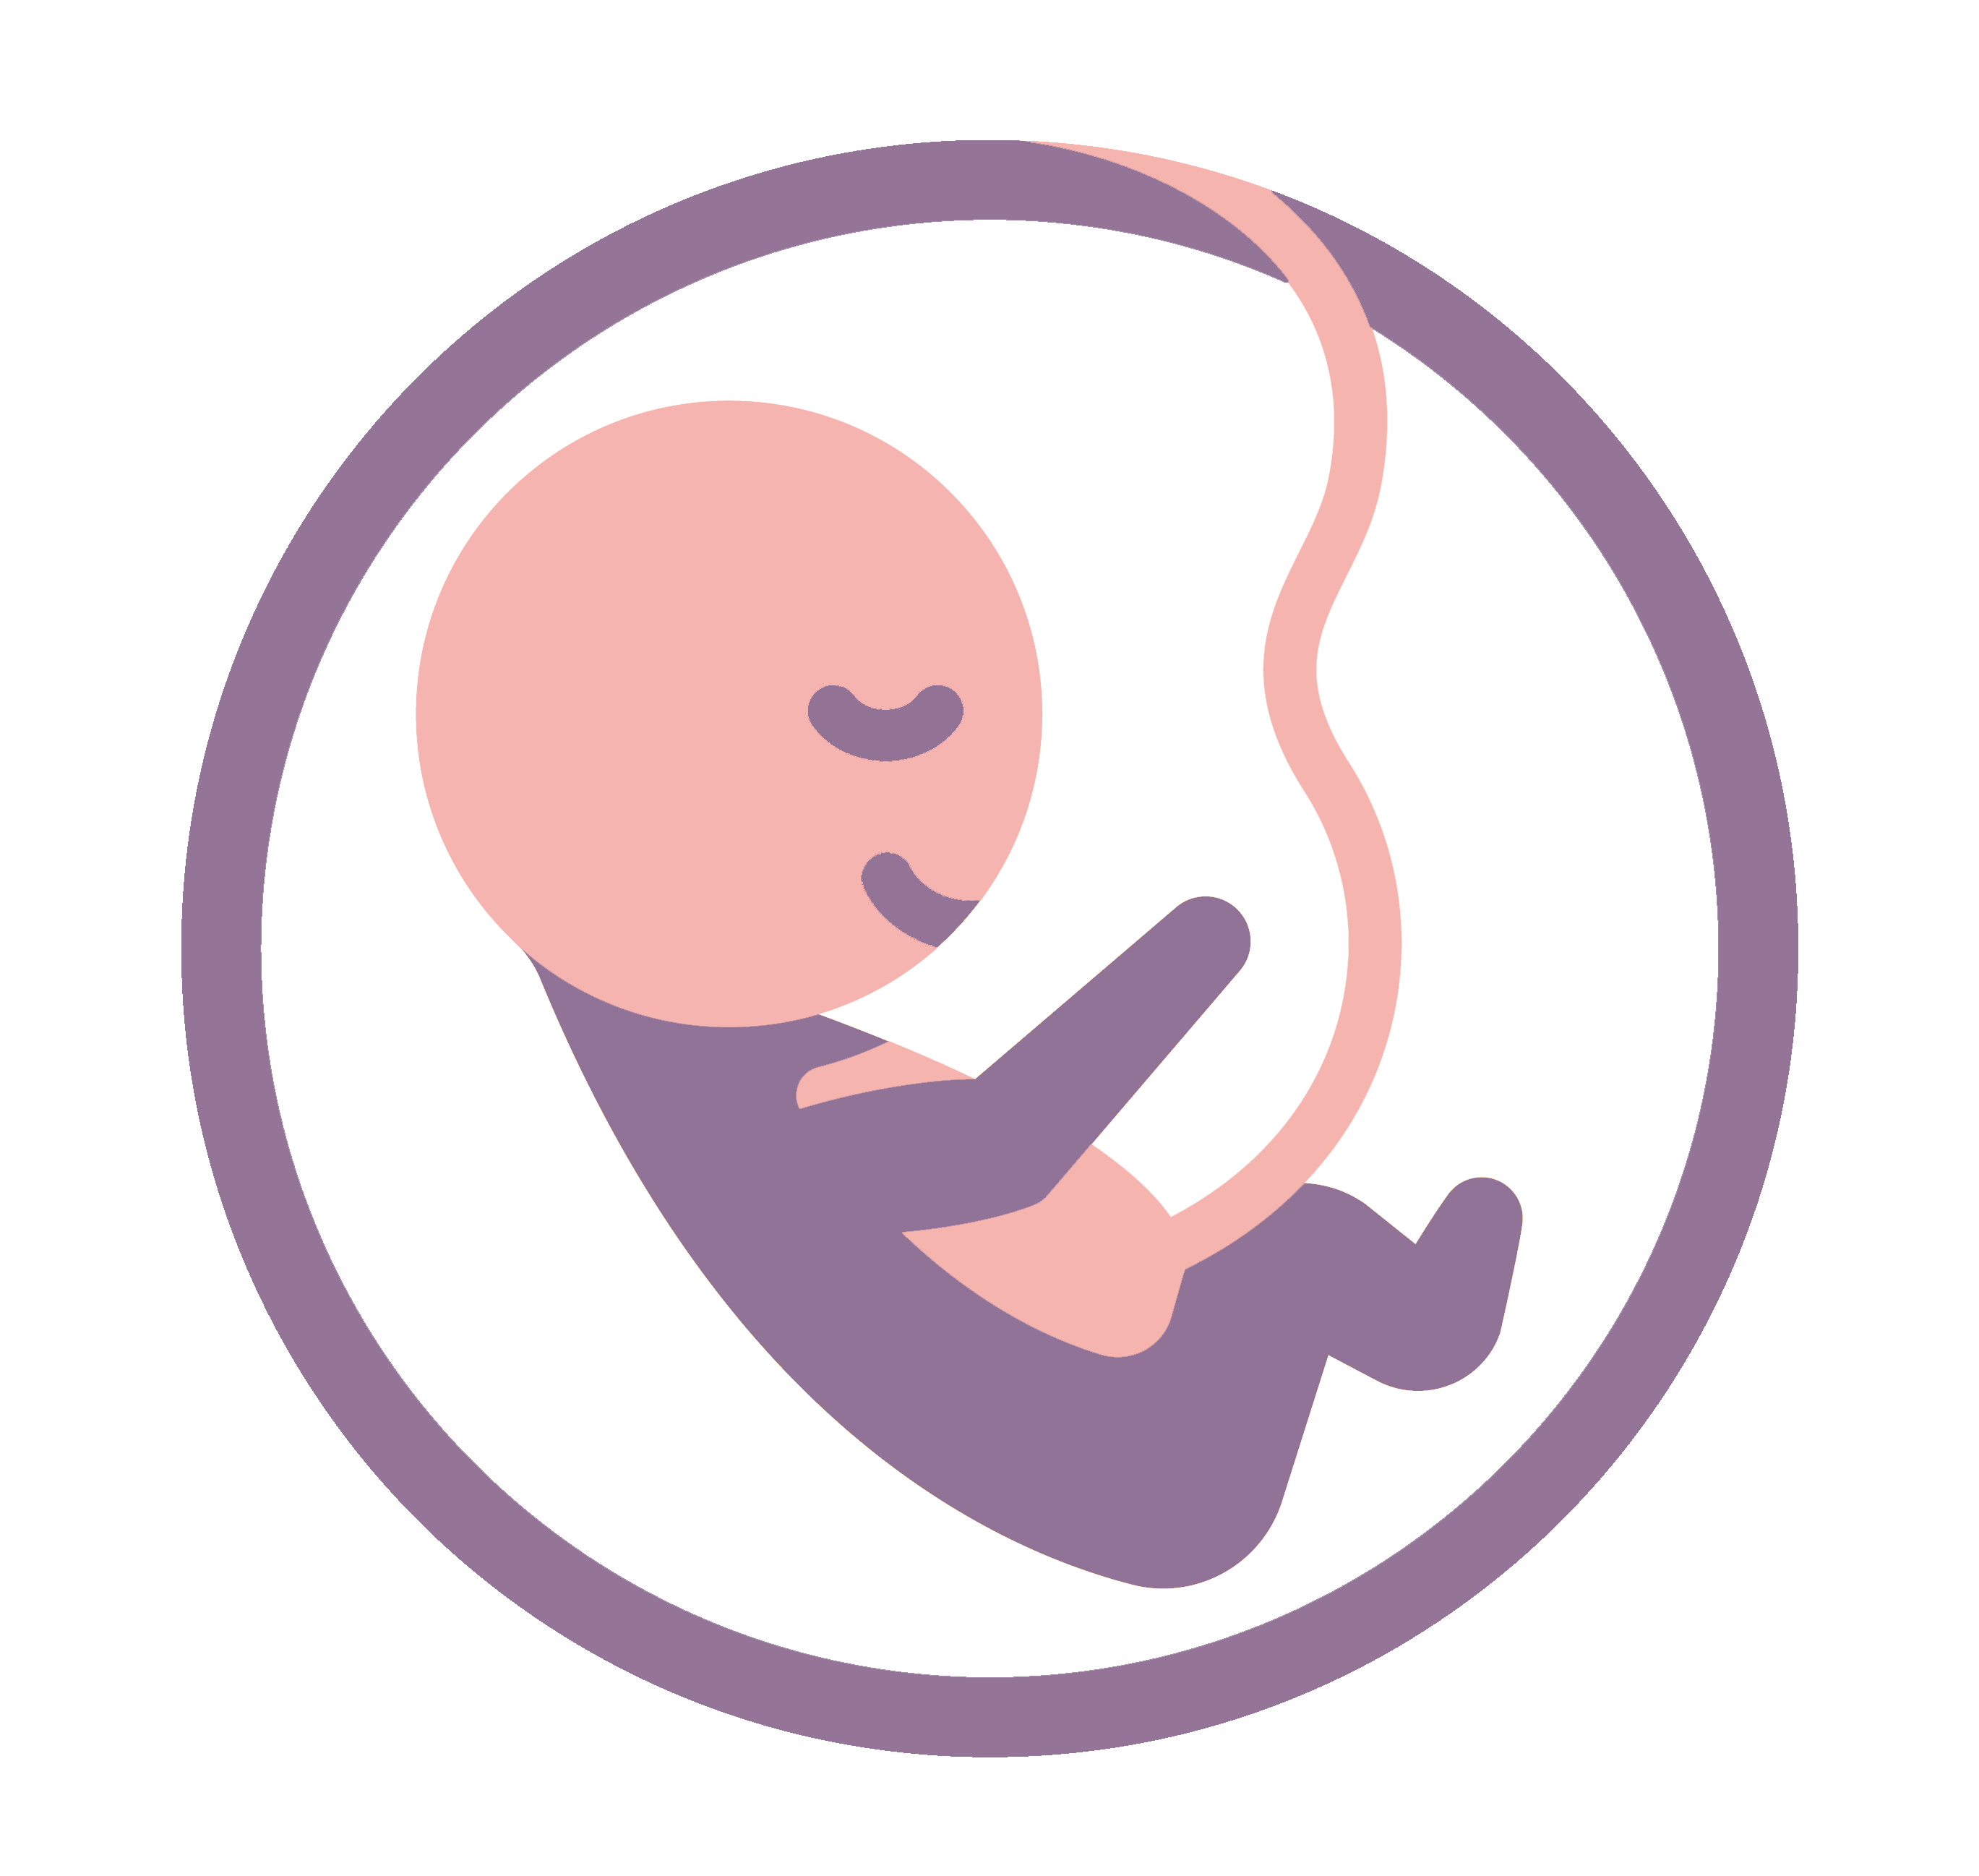
 
Cardiotocography (CTG) is used during pregnancy to monitor fetal heart rate and uterine contractions. It is monitor fetal well-being and allows early detection of fetal distress. 

 CTG interpretation helps in determining if the pregnancy is high or low risk.  An abnormal CTG may indicate the need for further investigations and potential intervention.

In this project, I will create a model to classify the outcome of Cardiotocogram test to ensure the well being of the fetus. 

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🌟 TABLE OF CONTENTS 🌟
</h2>


**IMPORTING LIBRARIES**

**LOADING DATA**

**DATA PREPROCESSING**

**DATA ANALYSIS**

**MODEL BUILDING**

**CONCLUSIONS**

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    📚 IMPORTING LIBRARIES 📚
</h2>


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Libraries:</b> Successfully import the recquired library
</div>

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🧾 LOADING DATA 🧾
</h2>


In [2]:
data = pd.read_csv("../input/fetal-health-classification/fetal_health.csv")

In [3]:
data.sample(5).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
658,130.000000,0.001000,0.000000,0.004000,0.000000,0.000000,0.000000,24.000000,1.200000,12.000000,7.600000,35.000000,120.000000,155.000000,1.000000,0.000000,134.000000,133.000000,135.000000,1.000000,0.000000,1.000000
1734,134.000000,0.008000,0.001000,0.007000,0.004000,0.000000,0.000000,59.000000,1.200000,0.000000,5.200000,109.000000,80.000000,189.000000,6.000000,0.000000,150.000000,146.000000,150.000000,33.000000,0.000000,1.000000
1226,125.000000,0.001000,0.000000,0.004000,0.000000,0.000000,0.000000,43.000000,0.700000,31.000000,7.800000,21.000000,120.000000,141.000000,0.000000,0.000000,131.000000,130.000000,132.000000,1.000000,0.000000,1.000000
1808,143.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,69.000000,0.300000,6.000000,9.400000,27.000000,132.000000,159.000000,1.000000,0.000000,145.000000,144.000000,146.000000,1.000000,0.000000,1.000000
825,152.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,62.000000,0.400000,59.000000,5.600000,25.000000,136.000000,161.000000,0.000000,0.000000,159.000000,156.000000,158.000000,1.000000,1.000000,2.000000


<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🧾 Data Information 🧾
</h2>


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data.describe().T.style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.000000,133.303857,9.840844,106.000000,126.000000,133.000000,140.000000,160.000000
accelerations,2126.000000,0.003178,0.003866,0.000000,0.000000,0.002000,0.006000,0.019000
fetal_movement,2126.000000,0.009481,0.046666,0.000000,0.000000,0.000000,0.003000,0.481000
uterine_contractions,2126.000000,0.004366,0.002946,0.000000,0.002000,0.004000,0.007000,0.015000
light_decelerations,2126.000000,0.001889,0.002960,0.000000,0.000000,0.000000,0.003000,0.015000
severe_decelerations,2126.000000,0.000003,0.000057,0.000000,0.000000,0.000000,0.000000,0.001000
prolongued_decelerations,2126.000000,0.000159,0.000590,0.000000,0.000000,0.000000,0.000000,0.005000
abnormal_short_term_variability,2126.000000,46.990122,17.192814,12.000000,32.000000,49.000000,61.000000,87.000000
mean_value_of_short_term_variability,2126.000000,1.332785,0.883241,0.200000,0.700000,1.200000,1.700000,7.000000
percentage_of_time_with_abnormal_long_term_variability,2126.000000,9.846660,18.396880,0.000000,0.000000,0.000000,11.000000,91.000000


**On This Dataset**
**Cardiotocograms (CTGs)** are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:

1. Normal
1. Suspect
1. Pathological

**Features**

* **'baseline value'** FHR baseline (beats per minute)
* **'accelerations'** Number of accelerations per second
* **'fetal_movement'** Number of fetal movements per second
* **'uterine_contractions'** Number of uterine contractions per second
* **'light_decelerations'** Number of light decelerations per second
* **'severe_decelerations'** Number of severe decelerations per second
* **'prolongued_decelerations'** Number of prolonged decelerations per second
* **'abnormal_short_term_variability'** Percentage of time with abnormal short term variability
* **'mean_value_of_short_term_variability'** Mean value of short term variability
* **'percentage_of_time_with_abnormal_long_term_variability'** Percentage of time with abnormal long term variability
* **'mean_value_of_long_term_variability'** Mean value of long term variability 
* **'histogram_width'** Width of FHR histogram
* **'histogram_min' Minimum** (low frequency) of FHR histogram
* **'histogram_max' Maximum** (high frequency) of FHR histogram
* **'histogram_number_of_peaks'** Number of histogram peaks
* **'histogram_number_of_zeroes'** Number of histogram zeros
* **'histogram_mode'** Histogram mode
* **'histogram_mean'** Histogram mean
* **'histogram_median'** Histogram median
* **'histogram_variance'** Histogram variance
* **'histogram_tendency'** Histogram tendency

* **Target**
* **'fetal_health'** Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    🔍 DATA ANALYSIS 🔍
</h2>

**The analysis consist of:**
* Count Plot
* Corelation Heat Map
* Implot
* Swarm And Boxen Plot


<Axes: xlabel='fetal_health', ylabel='count'>

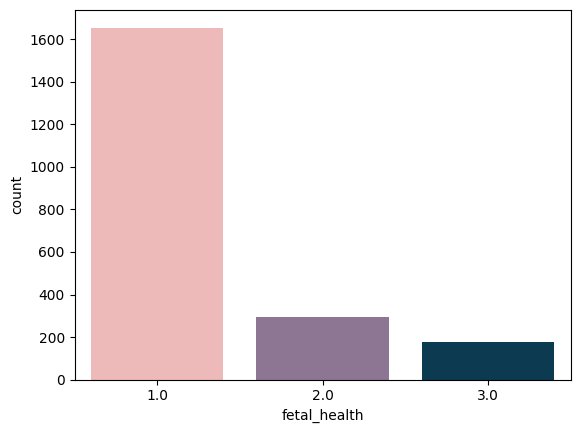

In [6]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

The count plot of targets indicates an imbalance in data. This is a case that tends to provide misleading classification accuracy. 

The performance measures that would provide better insight:
* Confusion Matrix
* Precision
* Recall
* F1 Score 

Let us evaluate the correlation matrix.

<Axes: >

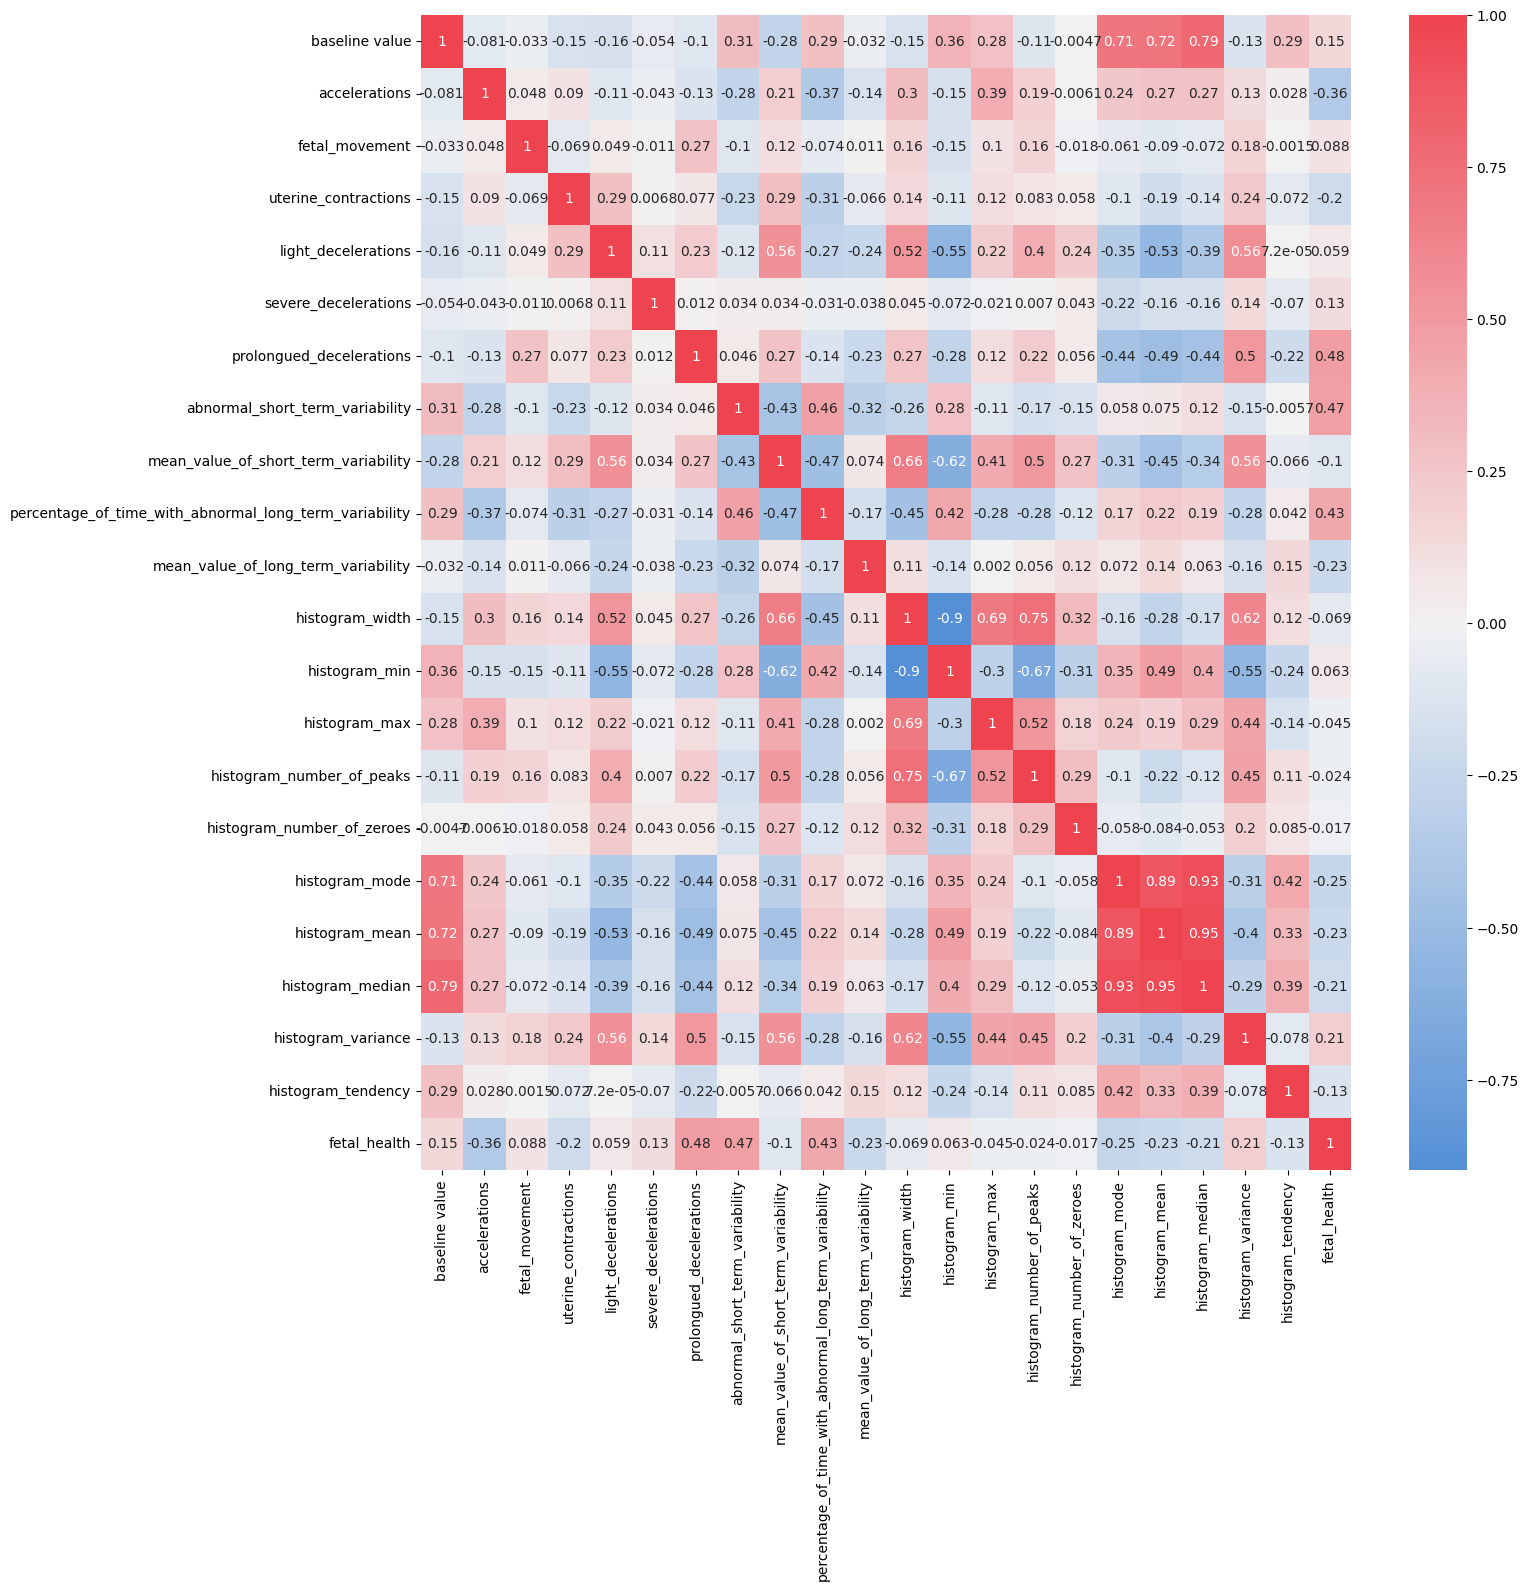

In [7]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Based on the correlation matix, it is clear that "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" and "mean_value_of_long_term_variability" are the features with higher correlation with fetal_health. Let's have a closer look at these with fetal_movement on y axis. This will provide a clearer picture of trends that indicate fetus health. 

**Accelerations Vs Fetal Movement by Fetal Health**

/opt/conda/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


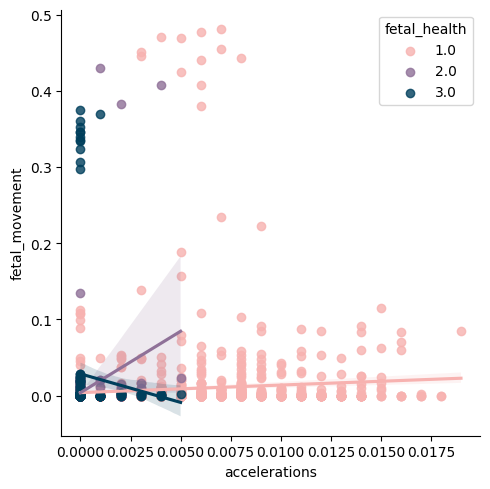

In [8]:
sns.lmplot(data =data,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

**Prolongued Decelerations Vs Fetal Movement by Fetal Health**

/opt/conda/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


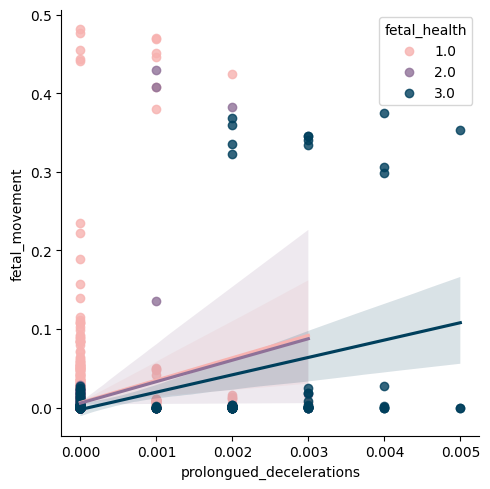

In [9]:
sns.lmplot(data =data,x="prolongued_decelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

**Abnormal Short Term Variability Vs Fetal Movement by Fetal Health**

/opt/conda/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


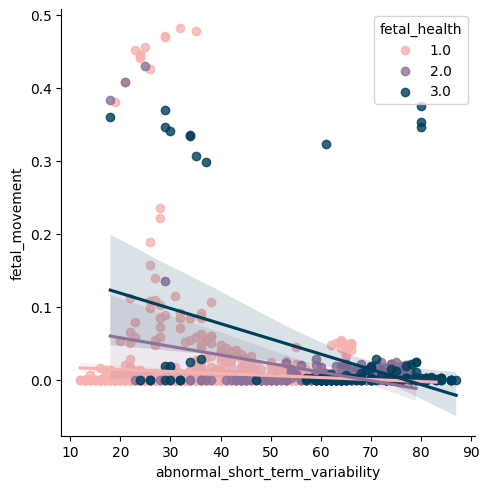

In [10]:
sns.lmplot(data =data,x="abnormal_short_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

**Mean Value Of Long Term Variability Vs Fetal Movement by Fetal Health**

/opt/conda/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


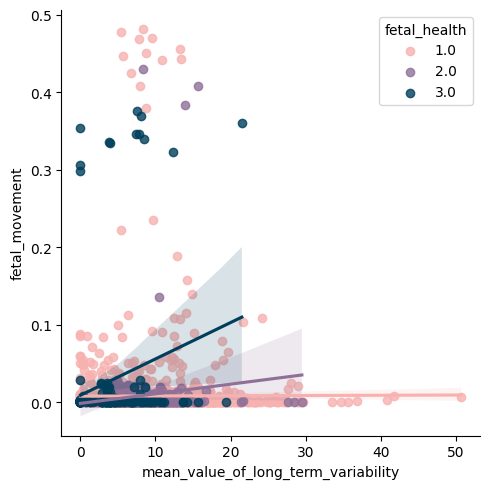

In [11]:
sns.lmplot(data =data,x="mean_value_of_long_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

We can see the rates of change of the above-mentioned values with each target show a specific trend. 
We can also spot outliers. Let's have a look at outliers on a more suitable plot.

In [12]:
# columns for detailed visualisation
cols=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']

In [13]:
import warnings

# Filter out future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Filter out user warnings
warnings.filterwarnings("ignore", category=UserWarning)

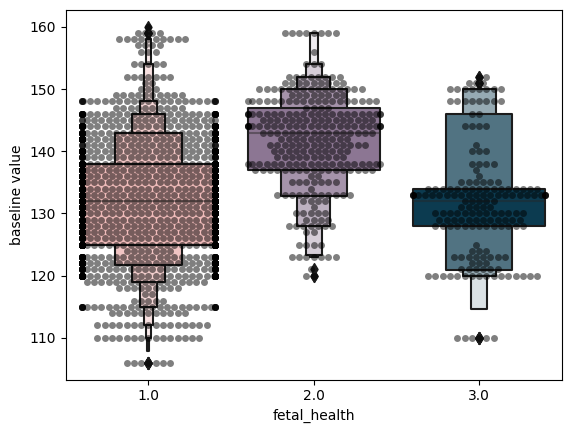

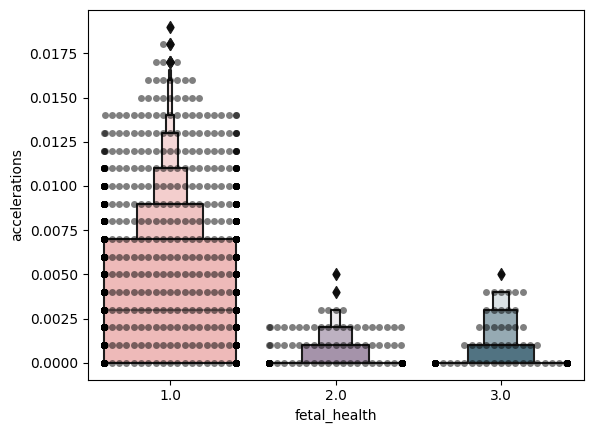

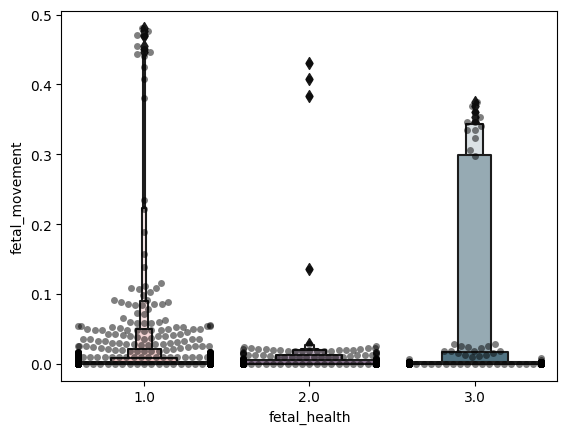

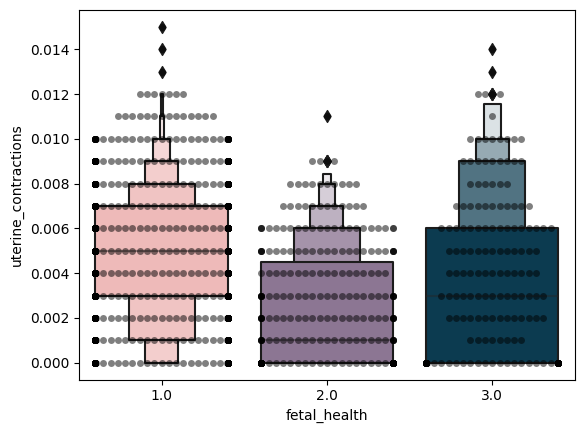

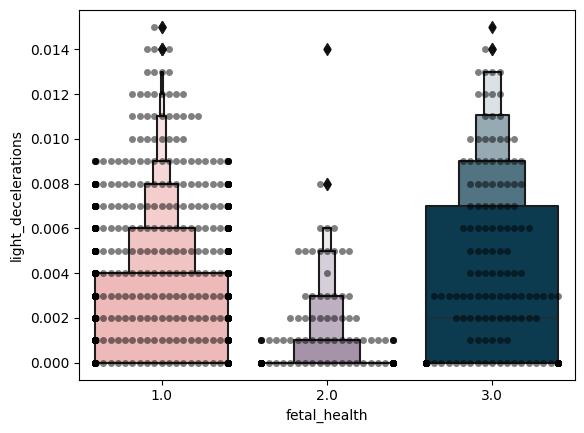

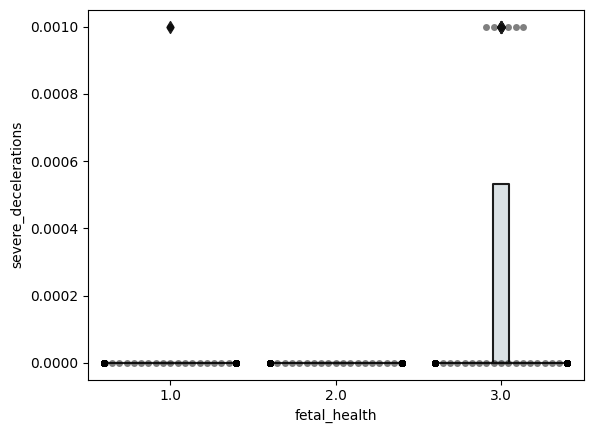

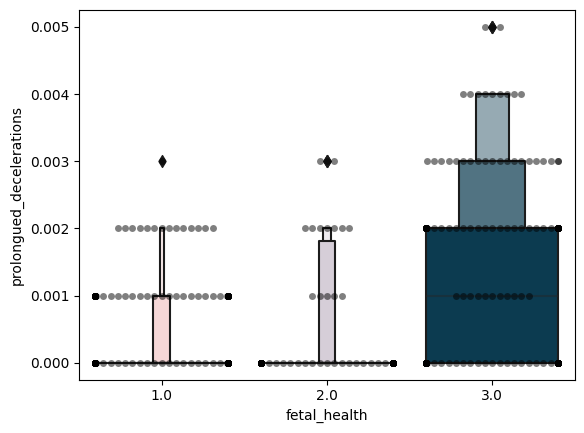

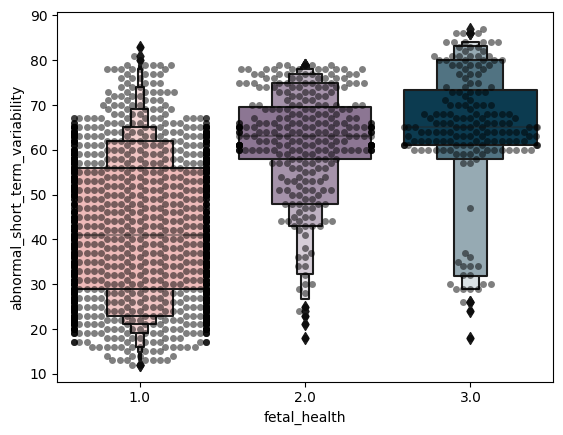

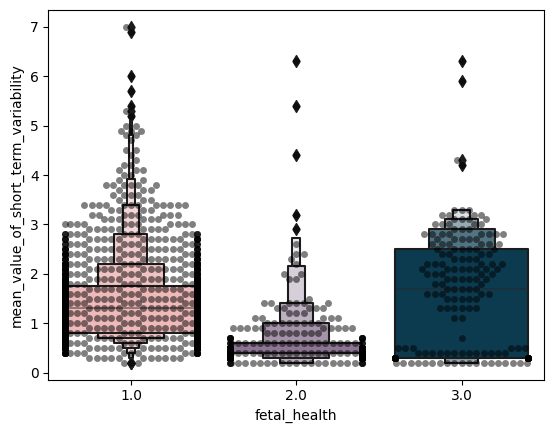

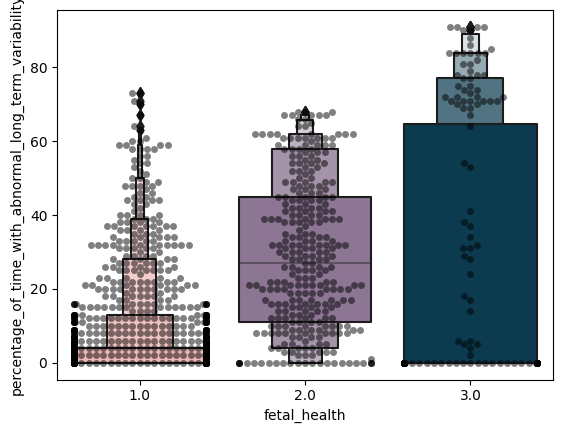

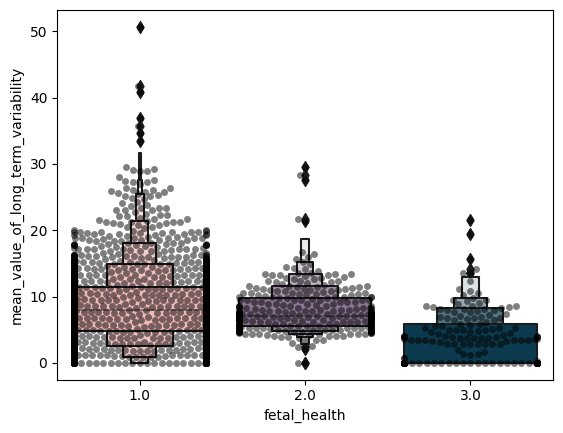

In [14]:
for i in cols:
    sns.swarmplot(x=data["fetal_health"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
    plt.show()

I spotted outliers on our dataset. However, it is not quite a good idea to remove them yet as it may lead to overfitting. Though we may end up with better statistics. 

A basic rule of thumb for the outliers in question is:

It is a measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation. In our case, this is the outcome of a CTG report so it is unlikely that this was a data entry error. 

If it is not a part of the population you are studying, you can legitimately remove the outlier. In this case, this all is about the fetus, and experts tag the classification. Let's stick with the expert opinion. 

Thus assuming that these are the natural part of the population we are studying, we should not remove it.

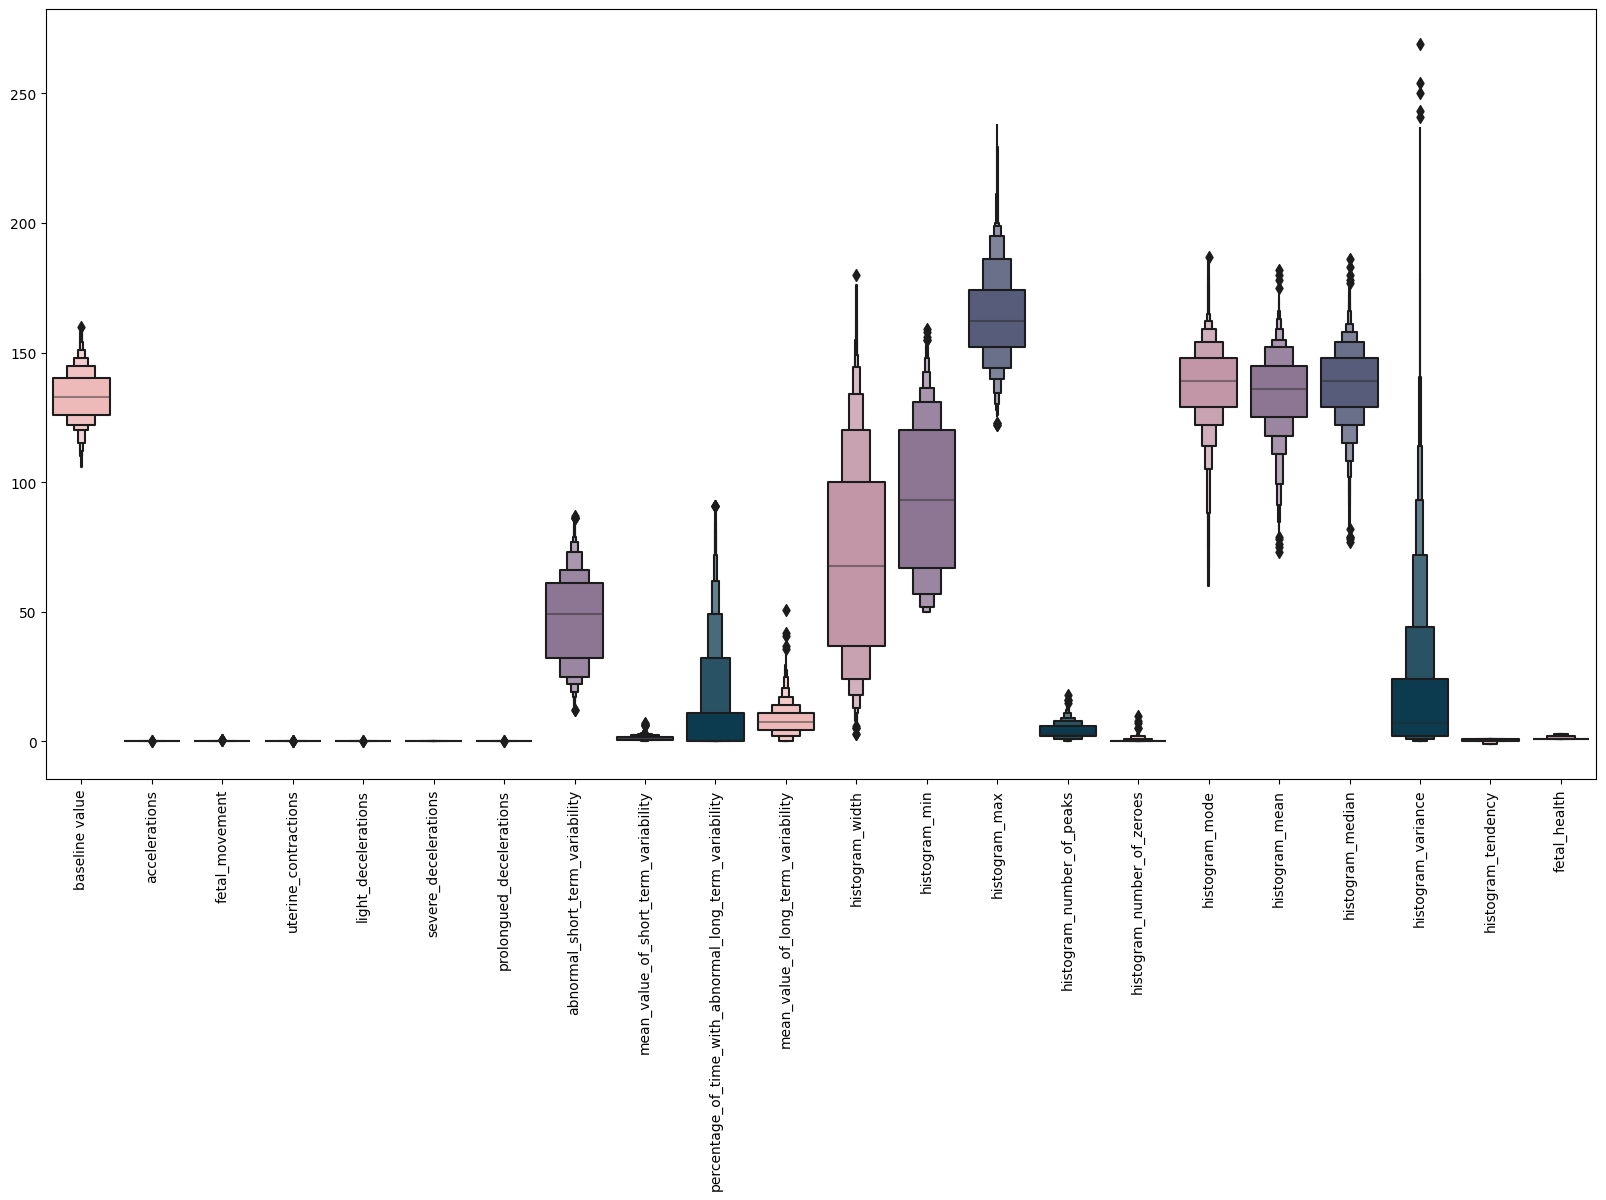

In [15]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = data,palette = shades)
plt.xticks(rotation=90)
plt.show()

The above plot shows the range of our feature attributes. All the features are in different ranges. To fit this in a model we must scale it to the same range.

In the model building, we will preprocess the features to do the same.

<h2 style="color:#6C5B7B; font-family: 'Arial Black', sans-serif; text-align: center; font-weight: bold; margin-top: 20px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
    ✔ MODEL SELECTION AND BUILDING ✔
</h2>
In this section we will:
* Set up features(X) and target(Y)
* Scale the features
* Split training and test sets 
* Model selection
* Hyperparameter tuning

In [16]:
#assigning values to features as X and target as y
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   

In [17]:
X_df.describe().T.style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.000000,0.000000,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.000000,-0.000000,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.000000,-0.000000,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.000000,-0.000000,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.000000,-0.000000,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.000000,0.000000,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.000000,0.000000,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.000000,-0.000000,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.000000,0.000000,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.000000,-0.000000,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


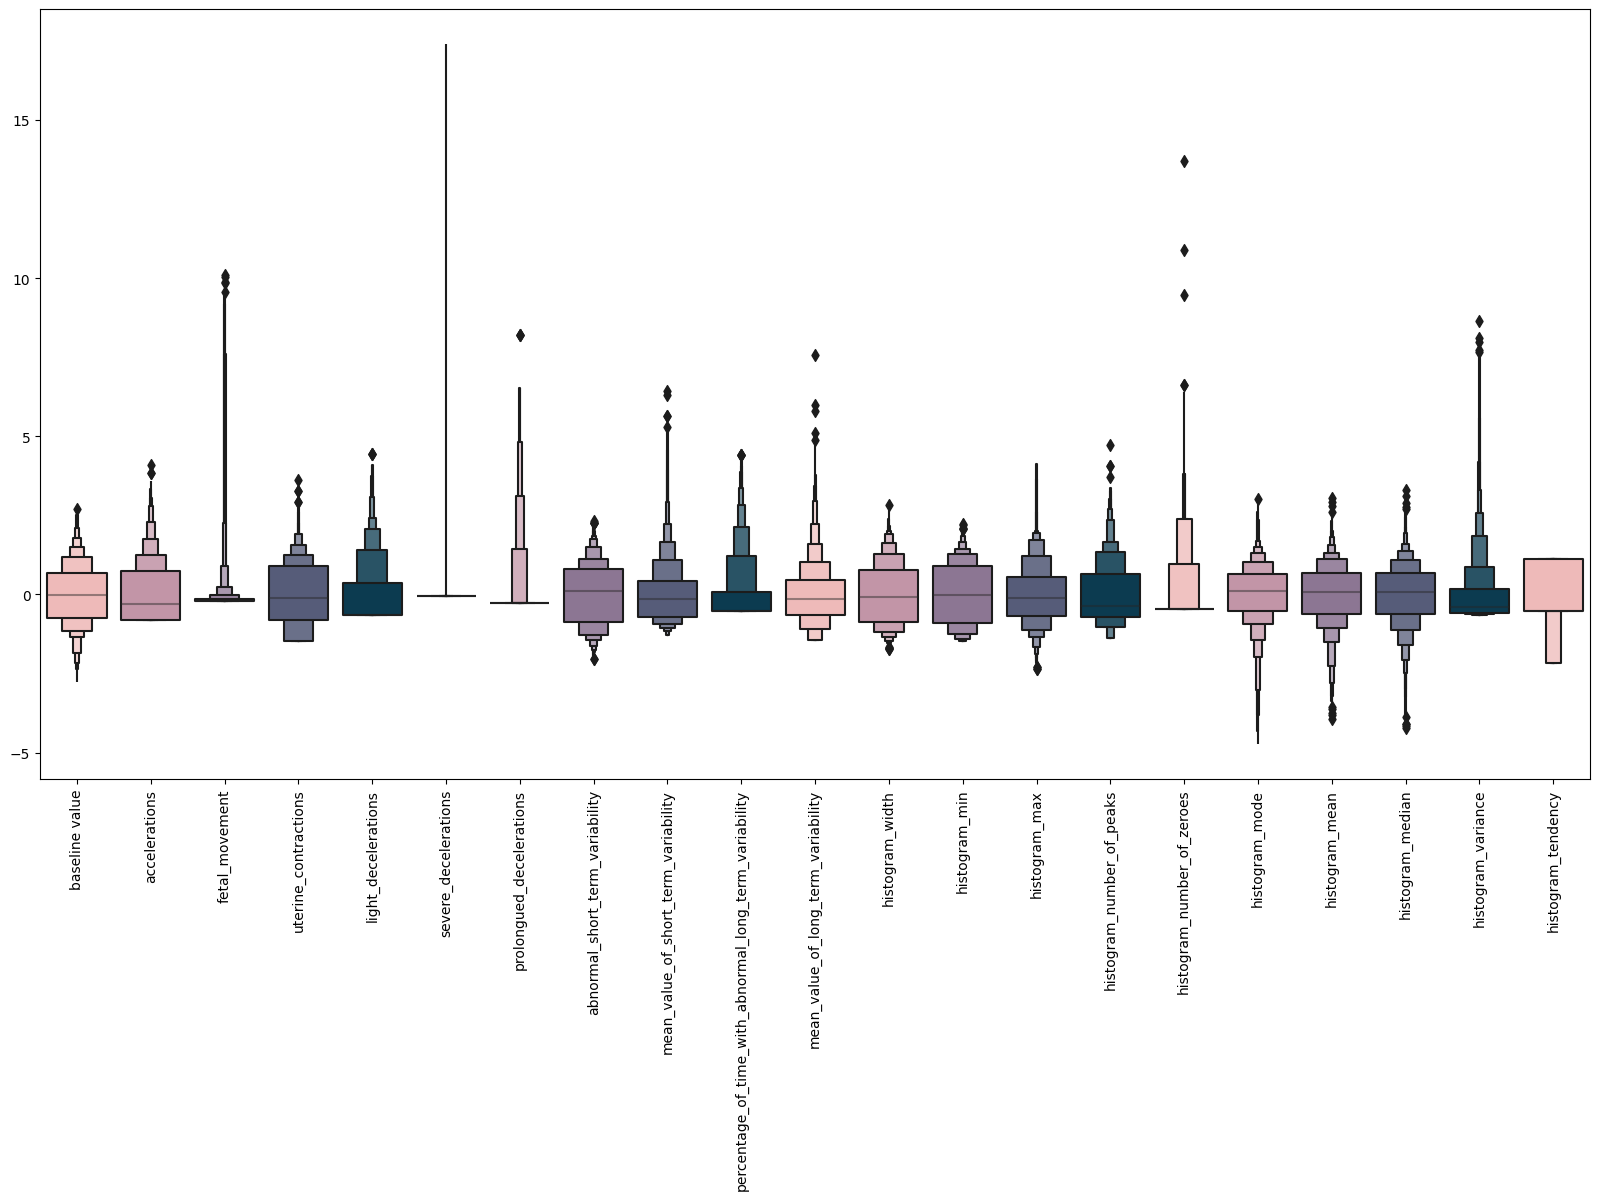

In [18]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [19]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [20]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("=========================================")
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))
print("=========================================")

Logistic Regression: 0.897170 
Decision Tree: 0.916683 
RandomForest: 0.938192 
SVC: 0.906594 


So Random Forest does best amongst the models to be the most accurate. Let us build a better random forest with grid search cv.
Let's find out how it performs on testset

In [21]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print("=========================================")
print("Accuracy is:",accuracy*100,"%")
print("=========================================")

Accuracy is: 94.35736677115987 %


In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Building a dictionary with a reduced list of optional values for RandomizedSearchCV
parameters = { 
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [4, 6, 8, 12],
    'criterion': ['gini', 'entropy'],
    'n_jobs': [-1]
}

# Number of random combinations to try
n_iter_search = 20

# Fitting the training set to find parameters with best accuracy using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=parameters, n_iter=n_iter_search, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Getting the outcome of RandomizedSearch
best_params = random_search.best_params_
print(best_params)


{'n_jobs': -1, 'n_estimators': 150, 'max_features': 'auto', 'max_depth': 12, 'criterion': 'gini'}


In [23]:
RF_model = RandomForestClassifier(**random_search.best_params_)
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
print("=========================================")
print("Accuracy is:",accuracy*100,"%")
print("=========================================")

Accuracy is: 94.35736677115987 %


In [24]:
!pip install colorama

In [25]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Assume predictions and y_test are defined
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="micro")

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Value': [accuracy*100, recall*100, precision*100, f1*100]
})

# Display the DataFrame in a styled format
styled_results_df = results_df.style.set_properties(**{
    'background-color': 'black',
    'color': 'white',
    'border-color': 'white',
    'border-style': 'solid',
    'border-width': '1px',
    'text-align': 'center',
    'font-weight': 'bold'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#333333'),
              ('color', 'white'),
              ('border-color', 'white'),
              ('border-style', 'solid'),
              ('border-width', '1px'),
              ('text-align', 'center'),
              ('font-weight', 'bold')]
}])

styled_results_df

,Metric,Value
0,Accuracy,94.043887
1,Recall,94.043887
2,Precision,93.934545
3,F1 Score,94.043887


In [26]:
from sklearn.metrics import classification_report
from colorama import Fore, Style, init

# Initialize colorama
init(autoreset=True)

# Assume predictions and y_test are defined
report = classification_report(y_test, predictions)

# Define a function to print the styled classification report
def print_styled_classification_report(report):
    print(f"{Fore.CYAN}{Style.BRIGHT}========================================================")
    print(f"{Fore.YELLOW}{Style.BRIGHT}            Classification Report            ")
    print(f"{Fore.CYAN}{Style.BRIGHT}========================================================")
    print(report)
    print(f"{Fore.CYAN}{Style.BRIGHT}========================================================")

# Call the function to print the styled classification report
print_styled_classification_report(report)


            Classification Report            
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       496
         2.0       0.89      0.75      0.82       101
         3.0       0.86      0.93      0.89        41

    accuracy                           0.94       638
   macro avg       0.90      0.89      0.89       638
weighted avg       0.94      0.94      0.94       638



<Axes: >

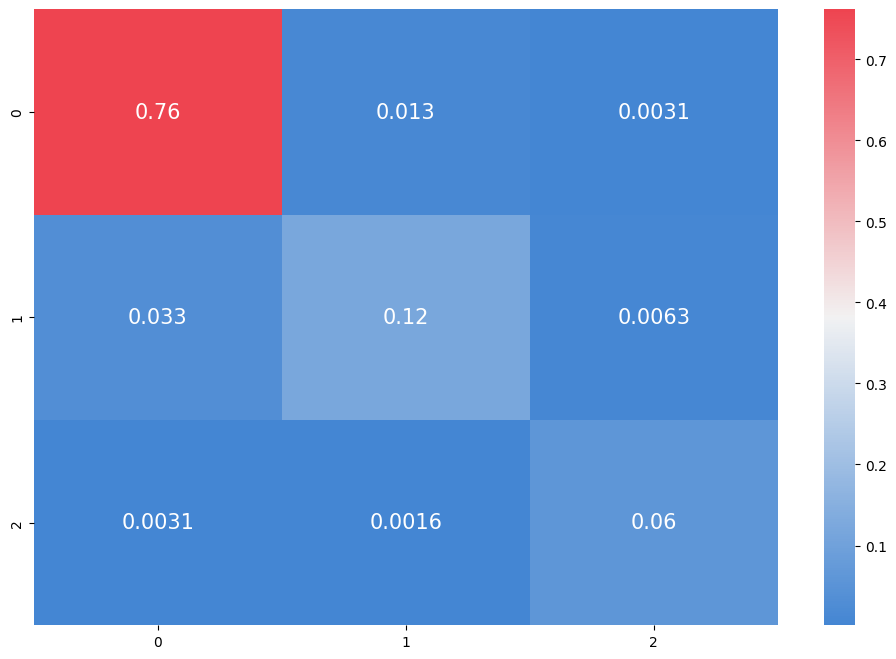

In [27]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

**<span style="color:#003f5c;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:#003f5c;"> If you have any suggestions or questions, I am all ears!</span>**

**<span style="color:#003f5c;">Best Wishes!</span>**

<a id="5"></a> 
# <h1 style='background:#f7b2b0; border:0; color:black'><center>END</center></h1> 